Project for the course in Microeconometrics | Summer 2020, M.Sc. Economics, Bonn University | Felix Kirsch

<h1>Replication of Angrist and Krueger (1991)</h1>

<h2>Introduction</h2>

Angrist and Krueger present estimates of the return to education using season of birth as instrument for school attendance. The relation of season of birth to school attendance is caused by interaction of compulsory schooling laws and school enrollment policies. Compulsory schooling attendance prohibits students to drop out of school before they have reached a certain age. Normaly, school enrollment policies require students to have passed the age of six at the beginning of the year in which they start to attend school. Therefore, students who are born at the beginning of the year start school at an older age than those who are born later in the year. In combination with the compulsory school attendance laws this enables individuals born at the beginning of the year to drop out of school with less years of schooling. Under the assumption that the fraction of students who want to leave school is independent from season of birth, students born later in the year are constrained to attend school longer. So, compulsory schooling laws introduce  a variation of school attendance dependening on the season of birth. Since time of birth is most likely uncorrelated to other personal characteristics, Angrist and Krueger use the variation to estimate the return to education.

In the first section of their paper, the authors examine the relation between years of education and season of birth using data from the 1980 US Census. They investigate the effect of quarter of birth on various educational outcome variables.
In the second section, the return to education is estimated using a two stage least squares approach. Thereby, quarter of birth is used as instrument for years of education. Angrist and Krueger present various results, comparing OLS and TSLS and using different control variables.

In the following I will present a replication of the results of Angrist and Krueger.

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

from IPython.display import HTML

import auxiliary.data_helper as dhlp
import auxiliary.figures as fgrs
import auxiliary.tables as tbl
import auxiliary.regressions as rgr

pd.set_option('precision', 2)
matplotlib.rcParams['figure.figsize'] = [10, 5]

# 2. Theoretical Background

# 3. Identification

# 4. Empirical Strategy

# 5. Replication of Angrist and Krueger (1991)

<h3>Data & Descriptive Statistics</h3>

The results of Angrist and Krueger are mostly based on micro data from the 1980 Census (link to documentation, Census of Population and Hosuing, 1980: Public Use Microdata). They created an extract from the 5 percent Public Use Sample, which is a self-weighting sample of 5 percent of the population as of April 1, 1980. These extract is provided here , and is used for the following replications.

The extract contains white and black men born in the United States between 1930 - 1959. It contains the quarter of birth (QOB), the year of birth (YOB), the age and the age accurate to the quarter of birth (AGEQ). The education variable describes years of completed schooling. There are 8 dummies for region of residence (ENOCENT, ESOCENT, MIDATL, MT, NEWENG, SOATL, WNOCENT, WSOCENT), 3 dummies for race (RACE, 1 = black), for martial status(MARRIED, 1 = married) and standard metropolitan staticstical area (SMSA, 1 = city center). Furthermore, the state variable describes the state of birth.

For most purposes the authors divide the data of the extract in two cohorts, men born from 1930-39 and men born form 1940-49. In most applications these groups are examined seperatly. Therefore, for both cohort descriptive statistics are presented.

In [2]:
# 
df = dhlp.get_df_census80_extract()

cohort30 = df.loc[(df['YOB'] >= 30) & (df['YOB'] <= 39)]
cohort40 = df.loc[(df['YOB'] >= 40) & (df['YOB'] <= 49)]

In [3]:
# summary statistics for 1930 - 39 Births
cohort30.describe().loc[['mean', 'std', 'min', 'max']]

,AGE,AGEQ,EDUC,ENOCENT,ESOCENT,LWKLYWGE,MARRIED,MIDATL,MT,NEWENG,CENSUS,STATE,QOB,RACE,SMSA,SOATL,WNOCENT,WSOCENT,YOB
mean,44.65,45.02,12.77,0.2,0.07,5.90,0.86,0.16,0.05,0.06,80.0,30.69,2.51,0.08,0.19,0.17,0.08,0.1,34.6
std,2.94,2.92,3.28,0.4,0.25,0.68,0.34,0.37,0.22,0.23,0.0,14.22,1.11,0.27,0.39,0.37,0.27,0.3,2.9
min,40.00,40.25,0.00,0.0,0.00,-2.34,0.00,0.00,0.00,0.00,80.0,1.00,1.00,0.00,0.00,0.00,0.00,0.0,30.0
max,50.00,50.00,20.00,1.0,1.00,10.53,1.00,1.00,1.00,1.00,80.0,56.00,4.00,1.00,1.00,1.00,1.00,1.0,39.0


In [4]:
# summary statistics for 1940 - 49 Births
cohort40.describe().loc[['mean', 'std', 'min', 'max']]

,AGE,AGEQ,EDUC,ENOCENT,ESOCENT,LWKLYWGE,MARRIED,MIDATL,MT,NEWENG,CENSUS,STATE,QOB,RACE,SMSA,SOATL,WNOCENT,WSOCENT,YOB
mean,34.32,34.69,13.57,0.2,0.07,5.80,0.8,0.15,0.05,0.06,80.0,30.13,2.54,0.08,0.19,0.17,0.08,0.1,44.92
std,2.87,2.86,2.98,0.4,0.25,0.65,0.4,0.36,0.22,0.23,0.0,14.53,1.12,0.27,0.39,0.38,0.27,0.3,2.84
min,30.00,30.25,0.00,0.0,0.00,-2.34,0.0,0.00,0.00,0.00,80.0,1.00,1.00,0.00,0.00,0.00,0.00,0.0,40.00
max,40.00,40.00,20.00,1.0,1.00,11.23,1.0,1.00,1.00,1.00,80.0,56.00,4.00,1.00,1.00,1.00,1.00,1.0,49.00


<h3>Season Of Birth, Compulsory Schooling, And Years Of Education</h3>

Students born in beginning of the year are allowed the leave school earlier than students born in the end of the year. Since all students start school at the same time, students born in the first quarter of the year can drop out of school with less years of schooling than students born in the other quarters. If the portion of individuals who like to leave school is the same for all quarters, quarter of birth and years of schooling would correlate. Students born earlier in the year would have less schooling than students born later.
The following figures show the relationship between the years of education and season of birth for the 1930-39 and the 1940-49 cohort. The graph displays the average years of completed education. The number und the observations describe the quarter of birth.

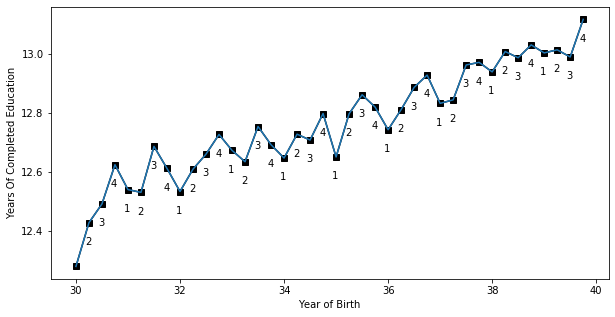

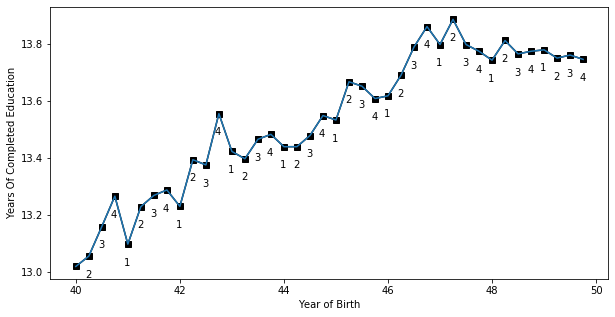

In [5]:
fgrs.plot_educ_against_yob(cohort30)
fgrs.plot_educ_against_yob(cohort40)

In the first figure the curve has an increasing trend and follows a reoccuring pattern. The average of completed years of education is lower for early quarters in the year and higher for late quarters. Most times the fourth quarter is higher than the first quarter of the following year.
In the second figure this pattern is also recognizable but not as pronounce as in the figure. The curve has an increasing trend untill 1948, then it flattens.

For further examination of these pattern Angrist and Krueger remove the trend inside the observations. The detrended average is computed by subtracting a moving average. This two-sided moving average is computed for each quarter using the average education of the two previous and the two following quarters:

$$ MA_{cj} = (E_{-2} + E_{-1} + E_{+1} + E_{+2}) / 4 $$

$MA_{cj}$ is the moving average for students born in year $c$ and quarter $j$. $E_q$ is the average education for students born $q$ quarters before or after. Then, the detrended average is $E_{cj} - MA_{cj}$.

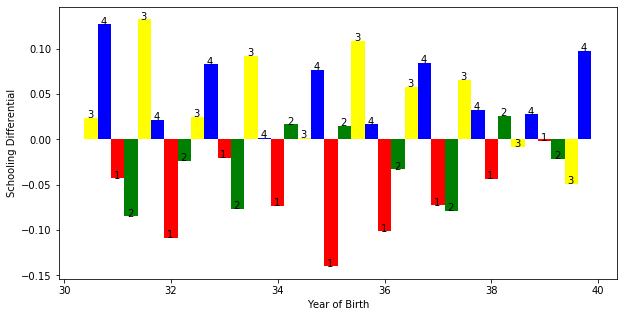

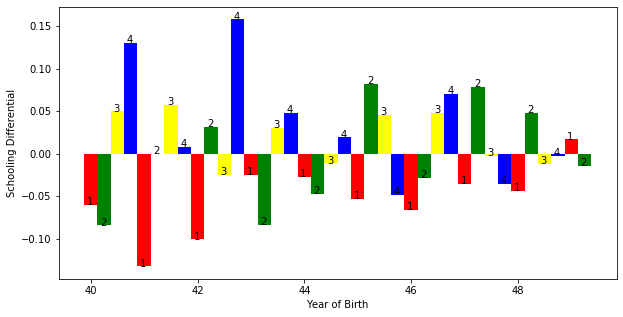

In [6]:
mean_educ = df.groupby(['YOB', 'QOB'])['EDUC'].mean().to_frame()
mean_educ['MV_AVG'] = dhlp.two_sided_moving_average(mean_educ.values)
mean_educ['DTRND'] = mean_educ['EDUC'] - mean_educ['MV_AVG']

fgrs.plot_bar_detrended_educ(mean_educ.loc[range(30, 40)])
fgrs.plot_bar_detrended_educ(mean_educ.loc[range(40, 50)])

The figures above show how quarter of birth and detrended average education are related. The plots indicate that season of birth is related to years of completed education. For all but one first quarter the schooling differential is negative, and most of the third and fourth quarters have a positive schooling differential.

To quantify the effect of quarter of birth on completed years of education Angrist and Krueger calculate regressions, usign the following formula:

$$(E_{icj} - MA_{cj}) = \alpha + \sum^{3}_{j}{\beta_{j} Q_{icj}} + \epsilon_{icj}$$
$$for \space i = 1, \dots, N_{c}; \space c = 1, \dots , 10; \space j = 1, 2, 3;$$

$E_{icj}$ represents the educational outcome variable for individual $i$ in cohort $c$. The authors run regressions on total years of education, high school graduation, years of education for high school graduates, college graduation, completed master's degree and completed doctoral degree. $MA_{cj}$ is the two-period, two-sided moving average of the corresponding outcome variable. $Q_{icj}$ is a dummy variable, which specifies if individual $i$ was born in the $j$th quarter of the year.
By construction of the moving average, it is necessary to exclude the first two and the last two observations from the regressions.

In [8]:
educ_vars = ['EDUC', 'DUMMY_HIGH_SCHOOL', 'DUMMY_COLLEGE', 'DUMMY_MASTER', 'DUMMY_DOCTOR']

df = dhlp.add_quarter_of_birth_dummies(df)
df = dhlp.add_education_dummies(df)
df = dhlp.add_detrended_educational_variables(df, educ_vars = educ_vars)

cohort30 = df.loc[(df['YOB'] >= 30) & (df['YOB'] <= 39)].dropna()
cohort40 = df.loc[(df['YOB'] >= 40) & (df['YOB'] <= 49)].dropna()

cohorts = [('1930-1939', cohort30), ('1940-1949', cohort40)]

results = rgr.get_regression_results_educational_variables(educ_vars, cohorts)

cohort30_high_school = cohort30.loc[cohort30['DUMMY_HIGH_SCHOOL'] == 1]
cohort40_high_school = cohort40.loc[cohort40['DUMMY_HIGH_SCHOOL'] == 1]

cohorts_high_school = [('1930-1939', cohort30_high_school), ('1940-1949', cohort40_high_school)]

results[4:4] = rgr.get_regression_results_educational_variables(['EDUC'], cohorts_high_school)

HTML(tbl.create_table_qob(results, outcome_variables = ['Total years of education', '', \
                                                        'High school graduate', '', \
                                                        'Years of educ. for high school graduates', '', \
                                                        'College graduate', '', \
                                                        "Completed master's degree", '', \
                                                        'Completed doctoral degree', '']))

{'var': 'EDUC', 'cohort': '1930-1939', 'mean': 12.792221746109913, 'ols': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001C798BC9208>}
{'var': 'EDUC', 'cohort': '1940-1949', 'mean': 13.560005774518189, 'ols': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001C798BC8C88>}
{'var': 'DUMMY_HIGH_SCHOOL', 'cohort': '1930-1939', 'mean': 0.7740680101561151, 'ols': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001C798BC9088>}
{'var': 'DUMMY_HIGH_SCHOOL', 'cohort': '1940-1949', 'mean': 0.8636907483031885, 'ols': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001C798BDBC88>}
{'var': 'EDUC', 'cohort': '1930-1939', 'mean': 14.006010782227914, 'ols': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001C797AE0948>}
{'var': 'EDUC', 'cohort': '1940-1949', 'mean': 14.281335551824304, 'ols': <statsmodels.regression.linear_model.RegressionResultsWrapper obj

The estimates in the table show the effect of quarter of birth on the outcome variable relative to individuals born in the fourth quarter. For each outcome variable regressions are made for men born between 1930-39 and men born between 1940-49. The standard errors are in parantheses below the estimates. The result of the F-Test is for the test if all quarter-of-birth dummies have jointly no effect.
For the educational outcome variables the authors make the assummption, that individuals with sixteen or more years of education have a college degree, individuals with eightteen or more years of education have a master's degree and individuals with twenty or more years of education have a doctoral degree.

The regressions show that men born in the first quarter have an lower average number of schooling years relative to men born in the fourth quarter. Also, men born in the first quarter are less likely to graduate from high school. The effect of quarter of birth on total years of education and high school graduation is highly significant. The diffrences between the quarters are more pronounced for the cohort of men born in the 1930s. The authors explane the declining of the effect by an increase in desired education for recent cohorts. Therefore, the compulsory schooling laws are binding for less individuals.
The third outcome variable is years of education for high school graduates. These regressions should examine the effect of quarter of birth on individuals who are not constrained by compulsory schooling (high school graduates are allowed to drop out of school).   


<h3>Estimating The Return To Education</h3>

# 6. Extension: Robustness Checks

# 7. Conclusion

# 8. References